**Anomaly Detection - Credit Card Fraud Analysis**

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:


import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]


In [ ]:
df = pd.read_csv('/content/fraud.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [ ]:
df=df.drop(['Unnamed: 0'], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder #encoder package of sklearn
le = LabelEncoder() #le variable has been assigned a labelencoder function

for col in df.columns:
    df[col] = le.fit_transform(df[col].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11697 entries, 0 to 11696
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   trans_date_trans_time  11697 non-null  int64
 1   cc_num                 11697 non-null  int64
 2   merchant               11697 non-null  int64
 3   category               11697 non-null  int64
 4   amt                    11697 non-null  int64
 5   first                  11697 non-null  int64
 6   last                   11697 non-null  int64
 7   gender                 11697 non-null  int64
 8   street                 11697 non-null  int64
 9   city                   11697 non-null  int64
 10  state                  11697 non-null  int64
 11  zip                    11697 non-null  int64
 12  lat                    11697 non-null  int64
 13  long                   11697 non-null  int64
 14  city_pop               11697 non-null  int64
 15  job                    11697 non-nul

In [ ]:
df1= df.sample(frac = 0.1,random_state=1)
df1.shape

(1170, 22)

In [ ]:
# Checking the missing values 
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

From the above table - There are no missing values in the dataset

In [ ]:
df.describe()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,11697.000000,11697.000000,11697.000000,11697.000000,11697.000000,11697.000000,11697.000000,11697.000000,11697.000000,11697.000000,...,11697.000000,11697.000000,11697.000000,11697.000000,11697.000000,11697.000000,11697.000000,11697.000000,11697.000000,11697.000000
mean,5718.969479,451.177225,345.241173,6.397367,3750.754125,170.531846,244.953407,0.445670,449.051552,418.297854,...,439.302984,447.928785,406.101137,239.447722,490.833889,5848.000000,5718.969479,5847.409849,5848.000000,0.002650
std,3302.417726,261.413036,202.787532,3.912136,2080.049564,94.757875,133.631772,0.497061,259.216150,241.386412,...,260.779262,256.537649,235.375901,134.466686,252.040884,3376.777384,3302.417726,3376.133079,3376.777384,0.053051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2862.000000,224.000000,167.000000,3.000000,2076.000000,85.000000,135.000000,0.000000,228.000000,206.000000,...,208.000000,232.000000,205.000000,121.000000,293.000000,2924.000000,2862.000000,2924.000000,2924.000000,0.000000
50%,5713.000000,445.000000,347.000000,6.000000,3802.000000,174.000000,248.000000,0.000000,448.000000,412.000000,...,434.000000,445.000000,403.000000,237.000000,509.000000,5848.000000,5713.000000,5848.000000,5848.000000,0.000000
75%,8578.000000,683.000000,521.000000,10.000000,5565.000000,246.000000,362.000000,1.000000,669.000000,633.000000,...,663.000000,673.000000,615.000000,358.000000,701.000000,8772.000000,8578.000000,8771.000000,8772.000000,0.000000
max,11448.000000,905.000000,692.000000,13.000000,7279.000000,337.000000,464.000000,1.000000,905.000000,834.000000,...,892.000000,892.000000,820.000000,474.000000,891.000000,11696.000000,11448.000000,11694.000000,11696.000000,2.000000


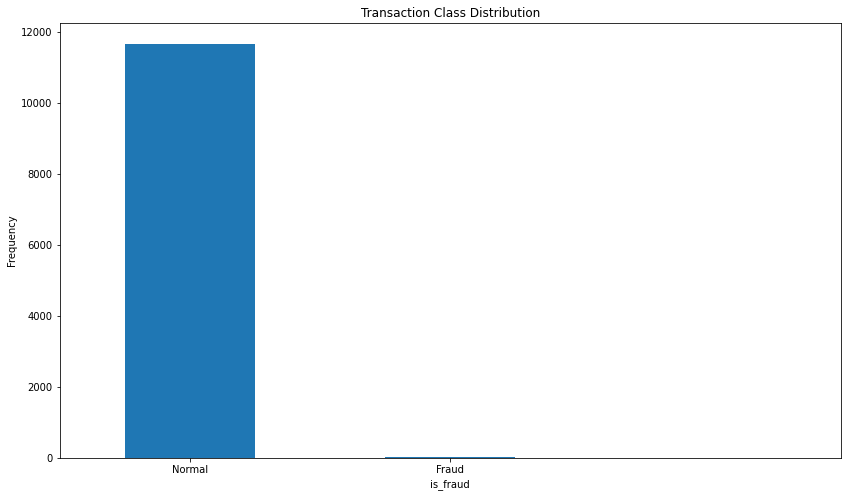

In [ ]:
#Determine the number of fraud and valid transactions in the entire dataset

count_classes = pd.value_counts(df['is_fraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("is_fraud")
plt.ylabel("Frequency");

In [ ]:
#Assigning the transaction class "0 = NORMAL  & 1 = FRAUD"
Normal = df[df['is_fraud']==0]
Fraud = df[df['is_fraud']==1]

In [ ]:
Normal.shape

(11667, 22)

In [ ]:
Fraud.shape

(29, 22)

In [ ]:
#How different are the amount of money used in different transaction classes?

Normal.amt.describe()

count    11667.000000
mean      3748.797891
std       2079.377167
min          0.000000
25%       2076.000000
50%       3801.000000
75%       5560.000000
max       7279.000000
Name: amt, dtype: float64

In [ ]:
#How different are the amount of money used in different transaction classes?

Fraud.amt.describe()

count      29.000000
mean     4447.586207
std      2247.694319
min       384.000000
25%      2645.000000
50%      5296.000000
75%      6368.000000
max      7255.000000
Name: amt, dtype: float64

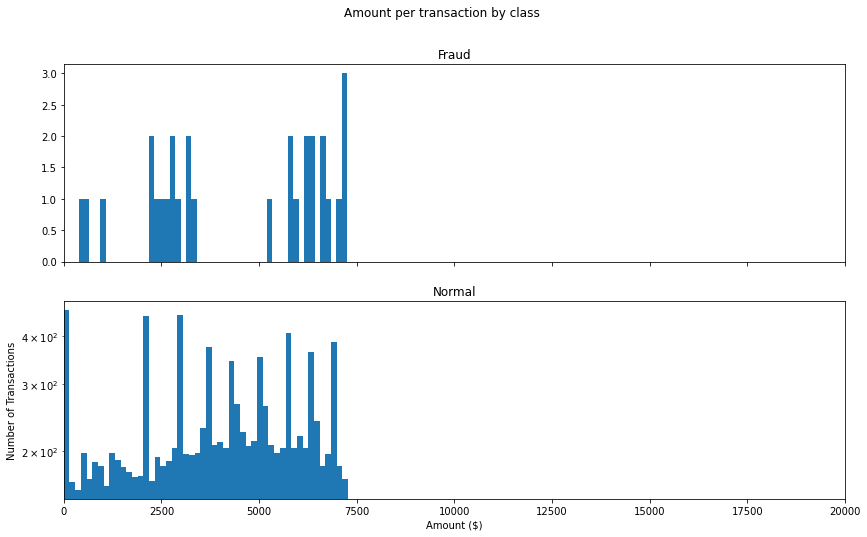

In [ ]:
#Let's have a more graphical representation of the data

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.amt, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.amt, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

**Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.**

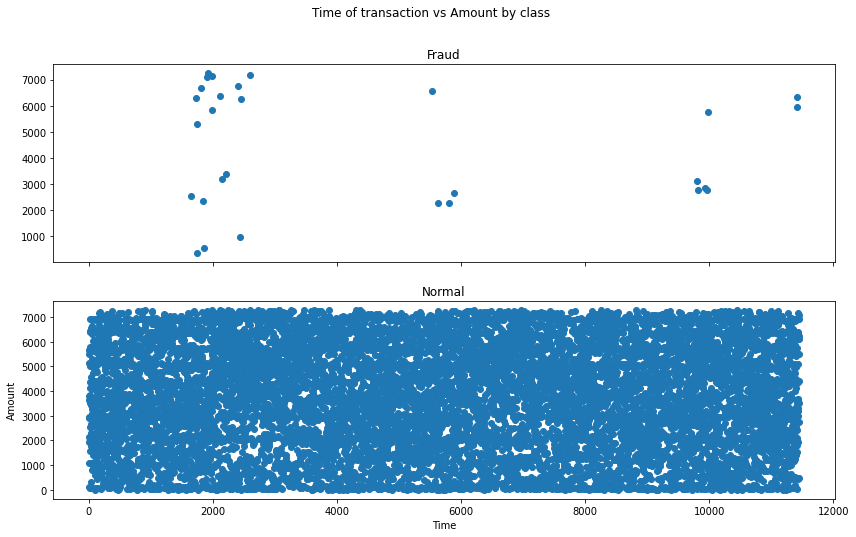

In [ ]:
#Graphical representation of the data

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.unix_time, Fraud.amt)
ax1.set_title('Fraud')
ax2.scatter(Normal.unix_time, Normal.amt)
ax2.set_title('Normal')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show();

In [ ]:
df1.shape

(1170, 22)

In [ ]:
#Determine the number of fraud and valid transactions in the dataset.

Fraud = df1[df1['is_fraud']==1]
Valid = df1[df1['is_fraud']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

In [ ]:
#Now let us print the outlier fraction and no of Fraud and Valid Transaction cases

print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Valid)))

0.003430531732418525
Fraud Cases : 4
Valid Cases : 1166


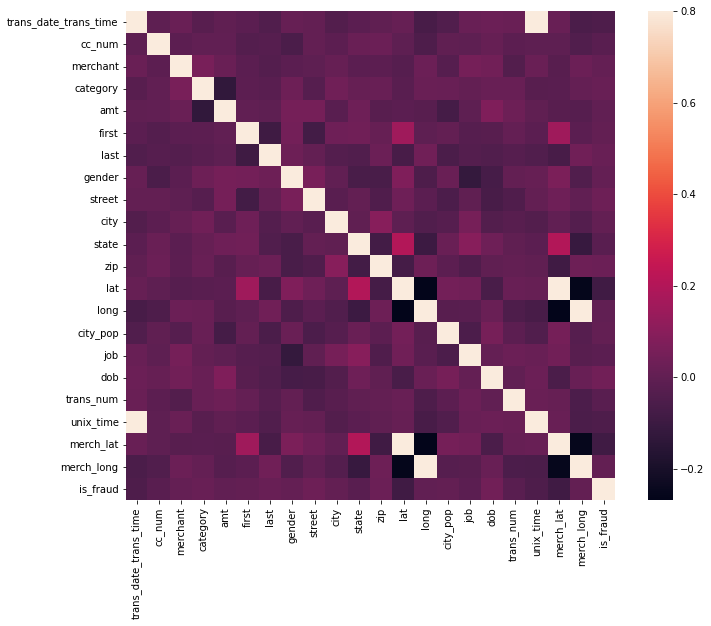

In [ ]:
#Correlation Matrix

correlation_matrix = df1.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [ ]:
#Get all the columns from the dataframe

columns = df1.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["is_fraud"]]
# Store the variable we are predicting 
target = "is_fraud"
# Define a random state 
state = np.random.RandomState(42)
X = df1[columns]
Y = df1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(1170, 21)
(1170,)


Define the outlier detection methods

In [ ]:
!pip install -U scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python -m pip show scikit-learn  # to see which version and where scikit-learn is installed
!python -m pip freeze  # to see all packages installed in the active virtualenv
!python -c "import sklearn; sklearn.show_versions()"

Name: scikit-learn
Version: 1.2.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.8/dist-packages
Requires: joblib, threadpoolctl, numpy, scipy
Required-by: yellowbrick, sklearn-pandas, qudida, mlxtend, lightgbm, librosa, imbalanced-learn, fastai
absl-py==1.3.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.3
aiosignal==1.3.1
alabaster==0.7.12
albumentations==1.2.1
altair==4.2.0
appdirs==1.4.4
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.1.0
audioread==3.0.0
autograd==1.5
Babel==2.11.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.1
blis==0.7.9
bokeh==2.3.3
branca==0.6.0
bs4==0.0.1
CacheControl==0.12.11
cachetools==5.2.0
catalogue==2.0.8
certifi==2022.9.24
cffi==1.15.1
cftime==1.6.2
chardet==3.0.4
charset-normalizer==2.1.1
click==7.1.2
clikit==0.6.2
cloudpickle==1.5.0
cm

In [ ]:
#Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma='scale',nu=0.05,max_iter=-1)
   
}

Fit the model

In [ ]:
#Fit the model

n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 9
Accuracy Score :
0.9923076923076923
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1166
           1       0.00      0.00      0.00         4

    accuracy                           0.99      1170
   macro avg       0.50      0.50      0.50      1170
weighted avg       0.99      0.99      0.99      1170

Local Outlier Factor: 9
Accuracy Score :
0.9923076923076923
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1166
           1       0.00      0.00      0.00         4

    accuracy                           0.99      1170
   macro avg       0.50      0.50      0.50      1170
weighted avg       0.99      0.99      0.99      1170

Support Vector Machine: 62
Accuracy Score :
0.947008547008547
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.95      0.